### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from warnings import filterwarnings
%matplotlib inline

### Loading the dataset

In [2]:
salary_dataset=pd.read_csv("D:\Documents\Python\Python_tutorial\DataScience (tutorial)\Practice Files\Data Set\Position_Salaries.csv")
salary_dataset.head(10)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Describe function to measure the central tendency of the data

In [3]:
salary_dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


### Finding the shape of the dataset

In [4]:
salary_dataset.shape

(10, 3)

### Using info() method to obtain a concise summary of the dataframe's structure and information

In [5]:
salary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


### Calculating correlation between Salary and Level

In [6]:
print('Correlation: {0}.'.format(np.corrcoef(salary_dataset['Salary'], salary_dataset['Level'])[0,1]))

Correlation: 0.8179494074776199.


### Visualization of the relationship between Salary and Level using pairplot

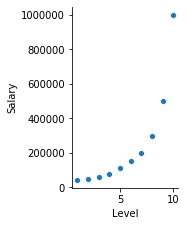

In [7]:
sns.pairplot(salary_dataset,x_vars='Level',y_vars='Salary',height=3,aspect=0.7)

### Taking a backup of the original dataset

In [8]:
back=salary_dataset.copy()

In [9]:
back.shape

(10, 3)

### Selecting the 2nd column from the dataframe usig iloc slicing operator

In [10]:
X=salary_dataset.iloc[:, 1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [11]:
y=salary_dataset.iloc[:, -1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

### Creating an instance of LinearRegression Class

In [12]:
linear_model=LinearRegression()

In [13]:
linear_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Using scatterplot to visualize the relationship beteen dependant and independant variables

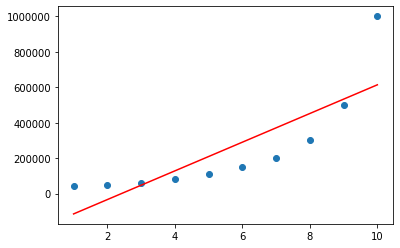

In [14]:
plt.scatter(X,y)
plt.plot(X,linear_model.predict(X),color='r')

### Importing Pipeline

In [15]:
from sklearn.pipeline import Pipeline

### Creating a function that takes degree of the polynomial as parameter

In [16]:
def polynomial_Regress(degree):
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    linear_reg=LinearRegression()
    polynomial_regress=Pipeline([
        ("poly_features",poly_features),
        ("linear_model",linear_model)
    ])
    polynomial_regress.fit(X,y)
    y_pred_new=polynomial_regress.predict(X)
    plt.scatter(X,y)
    plt.plot(X,y_pred_new,color='r')

### Calling the function and taking the degree=2

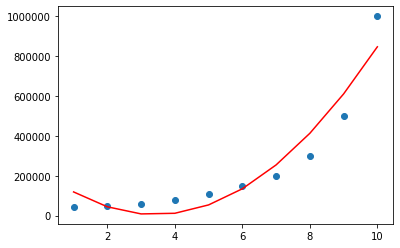

In [17]:
polynomial_Regress(2)

### Calling the function and taking the degree=3

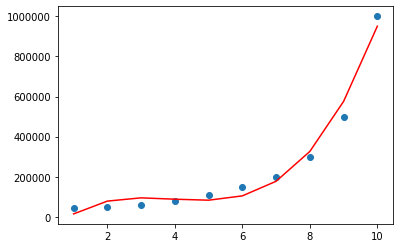

In [18]:
polynomial_Regress(3)

### Calling the function and taking the degree=4

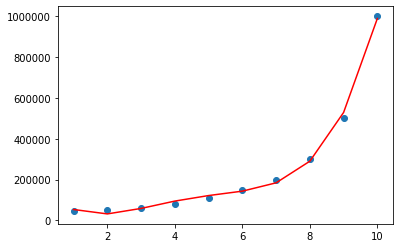

In [19]:
polynomial_Regress(4)

### Creating an instance of PolynomialFeatures Class

In [20]:
poly_model=PolynomialFeatures(degree=4)
X_poly=poly_model.fit_transform(X)

In [21]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

### Fitting the model of Linear Regression

In [22]:
linear_model.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

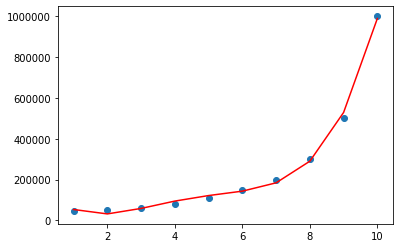

In [23]:
plt.scatter(X,y)
plt.plot(X,linear_model.predict(X_poly),color='r')

#### New data is fed to the model to get a predicted result

In [24]:
linear_model.predict(poly_model.transform([[8.5]]))

array([387705.69274467])

In [25]:
linear_model.predict(poly_model.transform([[5.5]]))

array([132148.43750003])

### Inference

From the above, it can be inferred that the model can make accurate predictions when the degree of the polynomial is 4.

First of all, we have visualized the relationship between dependant and independant variable and since the relationsip is non-linear, we are unable to get the best fit line using the LinearRegression model. Here the residual or error is large. Hence, Polyomial Regression has been applied to the dataset so that the error can be reduced. 